<a href="https://colab.research.google.com/github/Leonaxi/Machine-Learning-in-Finance/blob/main/L11_Fashion_MNIST_with_low_level_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q optax dm-haiku

     |████████████████████████████████| 145 kB 4.7 MB/s 
     |████████████████████████████████| 350 kB 52.6 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 


In [ ]:
!wget https://www.dropbox.com/s/a5t4txdgkys6rob/X.npy?dl=0;
!wget https://www.dropbox.com/s/jqmqptvtlg1lnf1/y.npy?dl=0;
!mv X.npy?dl=0 X.npy; mv y.npy?dl=0 y.npy;

--2022-10-25 17:06:53--  https://www.dropbox.com/s/a5t4txdgkys6rob/X.npy?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/a5t4txdgkys6rob/X.npy [following]
--2022-10-25 17:06:54--  https://www.dropbox.com/s/raw/a5t4txdgkys6rob/X.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbe81fa28b7564fcdedde6b2dd0.dl.dropboxusercontent.com/cd/0/inline/BvjJwlnAQ_nsSxxZOo8ctfrHYa2kPNkSy7FwV-HvIgbcBSGnarF3oRcEcGUcKW2IJ5nDrWhMHDcwflmNJKRZmiJ8EhgxQEFVWJz1bjtAVr9_E6CR_zwcdy-COHiqGABK5KEdMj8ApgnG3XmQruwUHwZHj2NiBx85nCERVPTcO4eAJw/file# [following]
--2022-10-25 17:06:55--  https://ucbe81fa28b7564fcdedde6b2dd0.dl.dropboxusercontent.com/cd/0/inline/BvjJwlnAQ_nsSxxZOo8ctfrHYa2kPNkSy7FwV-HvIgbcBSGnarF3oRcEcGUcKW2IJ5nDrWhMHDcwflmNJKRZmiJ8EhgxQE

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


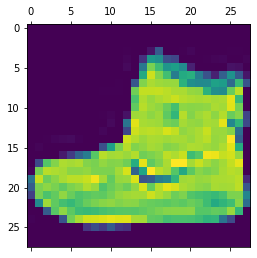

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import jax
import haiku as hk
rng = jax.random.PRNGKey(0)

X = jnp.load('X.npy')
y = jnp.load('y.npy')

class_names = ['T-shirt/top',  # 0
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9

plt.matshow(X[0].reshape(28, 28))
print(y[0])

In [ ]:
def model(X):
  X = hk.Linear(128)(X)
  X = jax.nn.relu(X)

  X = hk.Linear(10)(X)
  X = jax.nn.softmax(X)
  return X


init, model = hk.without_apply_rng(hk.transform(model))
Θ = init(rng, X[0])

lr = 1e-3
optimizer = optax.adam
opt_state = optimizer(lr).init(Θ)


def L(Θ, X, y):
  from jax.scipy.special import xlogy
  prob = model(Θ, X)
  return -(xlogy(y, prob)).sum(-1).mean()


@jax.jit
def update(Θ, opt_state):
  grads = jax.grad(L)(Θ, X, y)
  updates, opt_state = optimizer(lr).update(grads, opt_state)
  Θ = optax.apply_updates(Θ, updates)
  return Θ, opt_state


@jax.jit
def evaluation(Θ):
    P = model(Θ, X)
    prediction = jnp.argmax(P, axis=1)
    y_flat = jnp.argmax(y, axis=1)
    return (prediction == y_flat).mean()


In [ ]:
for iteration in range(5000):
    Θ, opt_state = update(Θ, opt_state)

print(evaluation(Θ))
# after 5000 iteration, this nnet would able to learn and achieve 98.5% accuracy in training set. but training set is not what you want

0.9853167
